In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 12
plt.rcParams.update({
    "text.usetex": False,
})

In [2]:
tech_numbers = [1222, 1227, 1276, 1278, 1280, 1282]

In [3]:
df = pd.read_csv(f'xy_canon_analysis/xy_canon_{tech_numbers[0]}.csv')

In [4]:
df.head()

,function,cv.cvid,lpp.lpp,xy_cds.points,xy_lengths.points,xy_distance.points,stepping.list,shift.float,file,sheet
0,xy_canon,cv,gmb.drawing,(1.6 1.6),(25 25),(28.4 28.4),((5)),NaN,canon_1222_d4t1t5_S22Y_GMB_GV1_2x,xy4
1,xy_canon,cv,gmb.drawing,(1.8 1.8),(25 25),(28.2 28.2),((5)),NaN,canon_1222_d4t1t5_S22Y_GMB_GV1_2x,xy4
2,xy_canon,cv,gmb.drawing,(2 2),(25 25),(28 28),((5)),NaN,canon_1222_d4t1t5_S22Y_GMB_GV1_2x,xy4
3,xy_canon,cv,gmb.drawing,(1.6 1.6),(61.74 63.72),(28.4 28.4),((5)),NaN,canon_1222_d4t1t5_S22Y_GMB_GV1_2x,pound
4,xy_canon,cv,gmb.drawing,(2 2),(25 25),(28 28),((5)),0.5,canon_1222_d4t1t5_S22Y_GMB_GV1_2x,swirl_xy4


In [5]:
df['lpp.lpp'].unique()

array(['gmb.drawing', 'gv1.drawing', 'alm.drawing', 'alp.drawing'],
      dtype=object)

In [6]:
df['xy_cds.points'].unique()

array(['(1.6 1.6)', '(1.8 1.8)', '(2 2)', '(2.2 2.2)', '(2.4 2.4)'],
      dtype=object)

In [7]:
df_plot = df.groupby(['lpp.lpp', 'xy_cds.points']).size().unstack()

In [8]:
df_plot.head()

xy_cds.points,(1.6 1.6),(1.8 1.8),(2 2),(2.2 2.2),(2.4 2.4)
lpp.lpp,,,,,
alm.drawing,NaN,NaN,4.0,4.0,8.0
alp.drawing,NaN,NaN,4.0,4.0,4.0
gmb.drawing,4.0,2.0,4.0,2.0,2.0
gv1.drawing,NaN,NaN,2.0,2.0,2.0


In [49]:
def plot_canon_xy(df):
    # matrix plot the data
    # the y-axis is different lpp.lpp
    # the x-axis is the xy_cds.points, use the first coordinate "a" from tuple "(a,a)"
    # the color is the number of points, NaN is zero
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df.fillna(0), cmap="Blues", ax=ax, cbar_kws={'label': 'Number of Points'})
    ax.set_ylabel('LPP')
    ax.set_xlabel('XY CDS Points')
    ax.set_title('Canon XY CDS Points')
    # show the boundary of each cell
    ax.hlines(range(len(df.index)), *ax.get_xlim(), color='grey', lw=0.5)
    ax.vlines(range(len(df.columns)), *ax.get_ylim(), color='grey', lw=0.5)
    plt.tight_layout()
    plt.show()


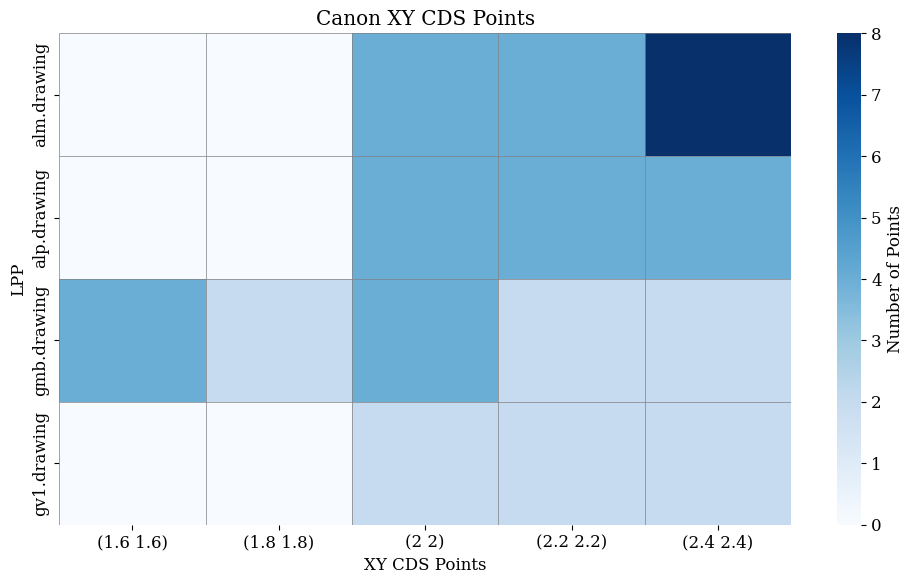

In [50]:
plot_canon_xy(df_plot)